Formateo los datos

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [16]:
def format_pd(data, intento):
    data = data[data["Intento"] == intento].copy()
    # Arranca en t = 0
    print(data["t"].iloc[0])
    data["t"] = data["t"] - data["t"].iloc[0]
    data = data.drop(columns=["Intento"])
    return data

Este lo chorie del campus

In [17]:
datasets = ['data_dosplata_oro_PAPEL.csv', 'data_dosplataymadera_oro.csv', 'data_maderayoro_dosplata.csv', 'data_plata_dosplata.csv', 'data_tresplata_oro_PAPEL.csv' ] 
data = pd.read_csv(datasets[3])
f_data = format_pd(data=data, intento=1)

1140


680


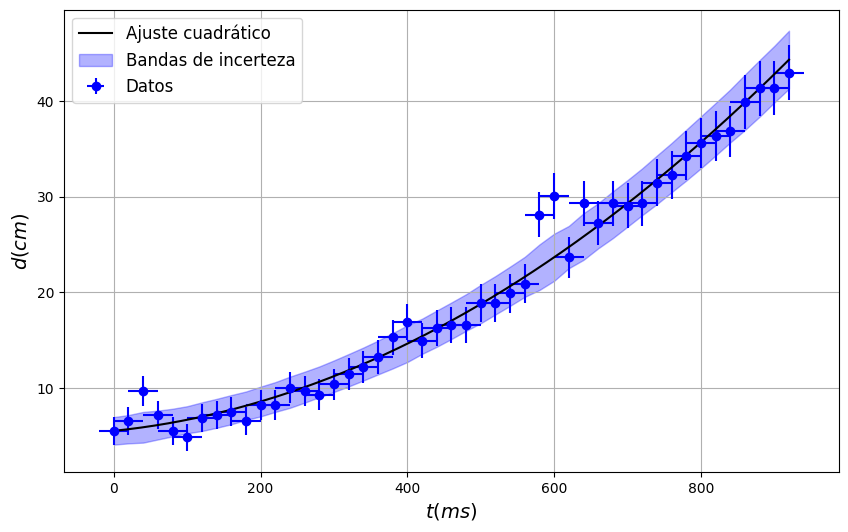

Parámetros del ajuste cuadrático:
a = 3.721621345586515e-05 ± 4.40382860225053e-06
b = 0.007853711306524987 ± 0.0038127743966286445
c = 5.5638506976164095 ± 0.6571377286532868
1180


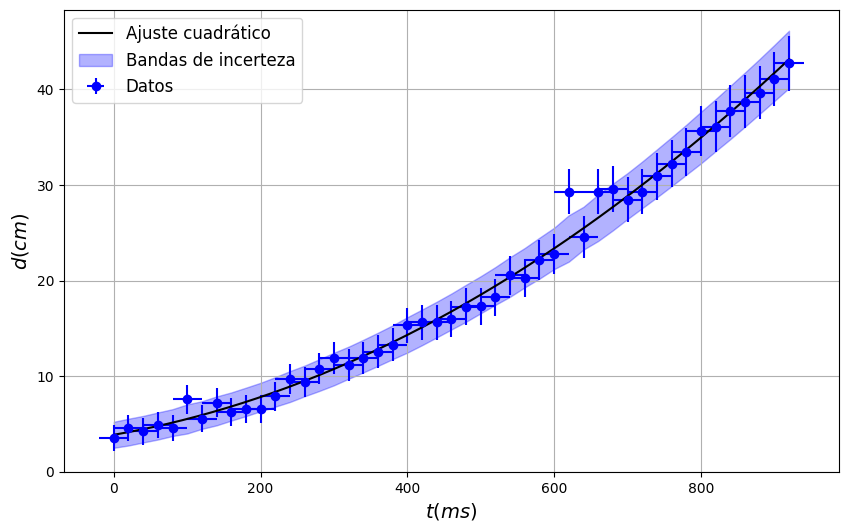

Parámetros del ajuste cuadrático:
a = 3.186432344955978e-05 ± 4.299666021686511e-06
b = 0.013385359443424895 ± 0.003687663626433973
c = 3.8592954886305426 ± 0.6265503636623481
1420


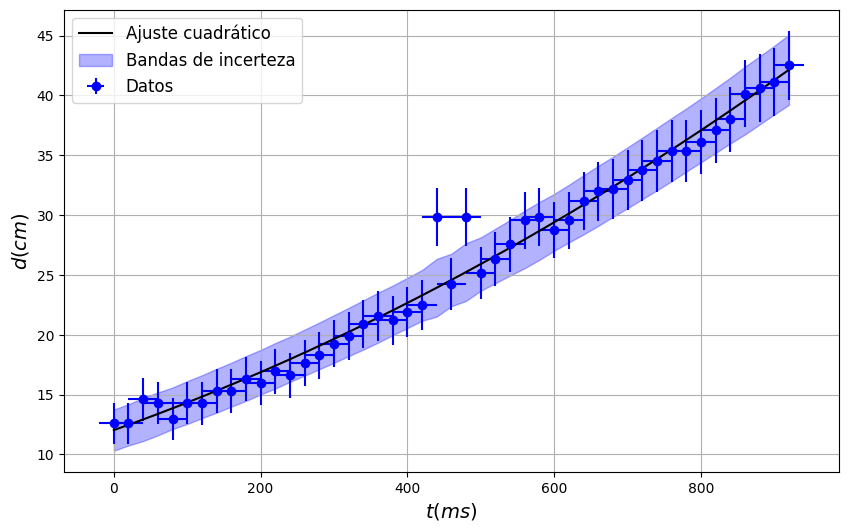

Parámetros del ajuste cuadrático:
a = 1.186024463282328e-05 ± 4.895283038203859e-06
b = 0.02182074983583193 ± 0.004348507639227398
c = 12.030500925746656 ± 0.7697688653710416
620


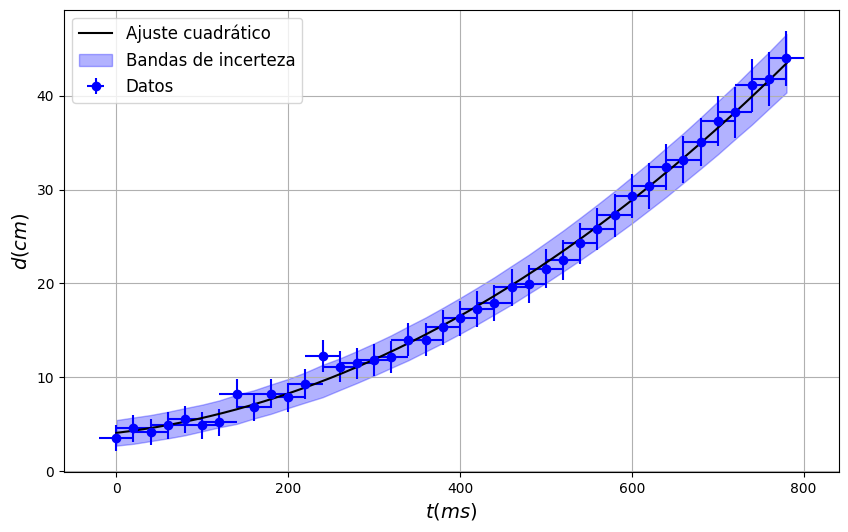

Parámetros del ajuste cuadrático:
a = 5.086747072591338e-05 ± 6.435748221231762e-06
b = 0.010781095301941383 ± 0.004657639430854774
c = 4.0936410201470315 ± 0.6696943514842095
380


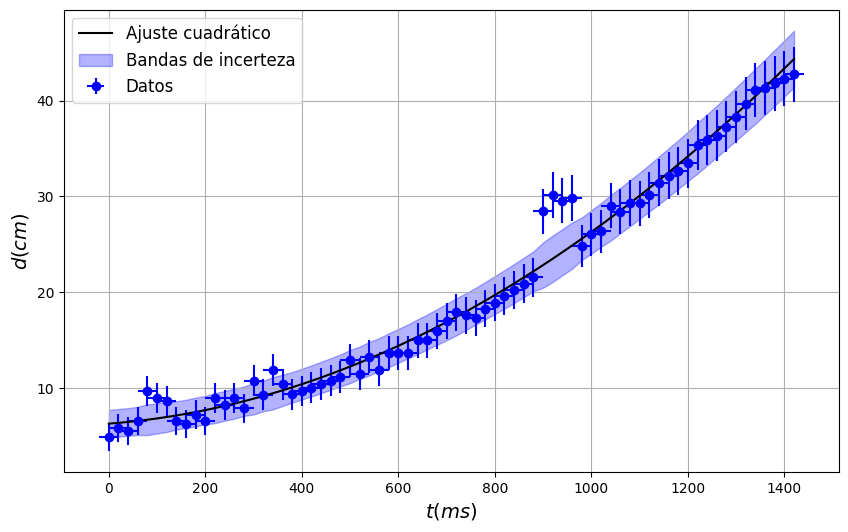

Parámetros del ajuste cuadrático:
a = 1.617750548474794e-05 ± 1.510877660264892e-06
b = 0.003823602730080708 ± 0.002017300821476409
c = 6.298409302134575 ± 0.5410773930951339
860


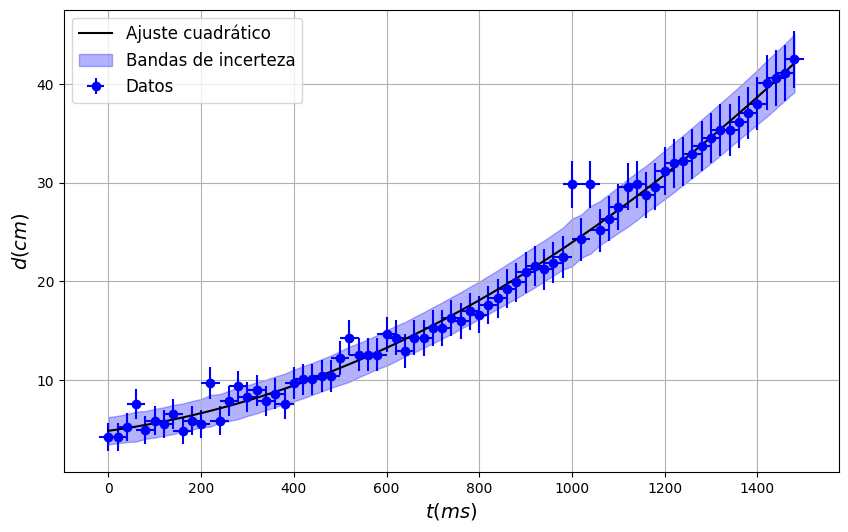

Parámetros del ajuste cuadrático:
a = 1.2686404942004264e-05 ± 1.3371006458651444e-06
b = 0.006391662364891528 ± 0.0018551364482810246
c = 4.860657534931264 ± 0.5139620390320844
1140


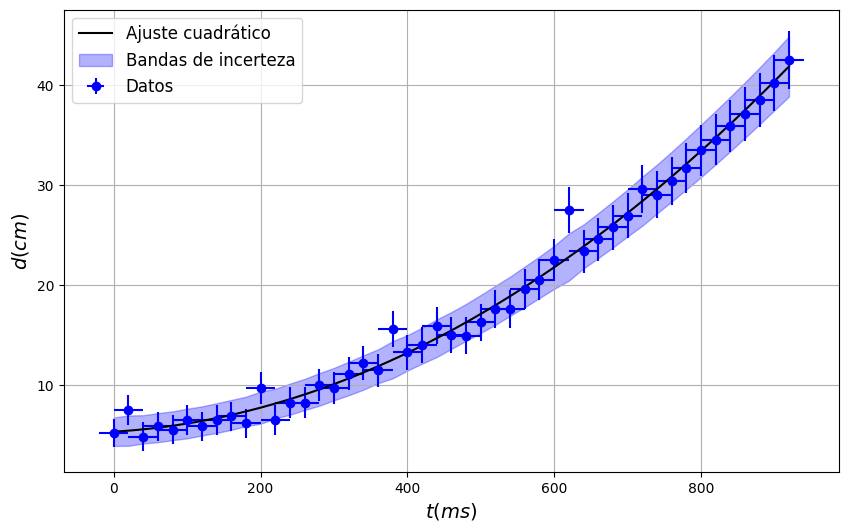

Parámetros del ajuste cuadrático:
a = 3.839472950111807e-05 ± 4.298241362623286e-06
b = 0.004310624904966867 ± 0.003717449145929487
c = 5.374783723467983 ± 0.643438847727338
1580


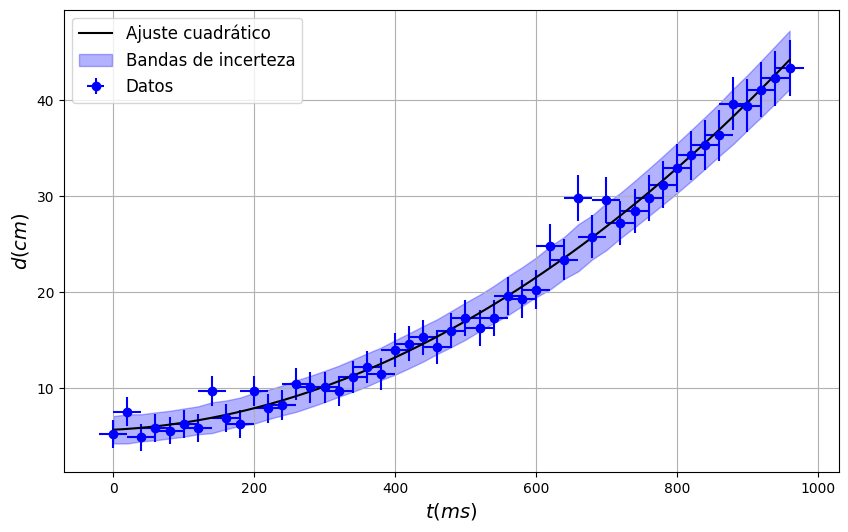

Parámetros del ajuste cuadrático:
a = 3.805455340791502e-05 ± 3.920780159882566e-06
b = 0.003605889571213112 ± 0.0035230415604311487
c = 5.659948234136554 ± 0.6345059693560382
160


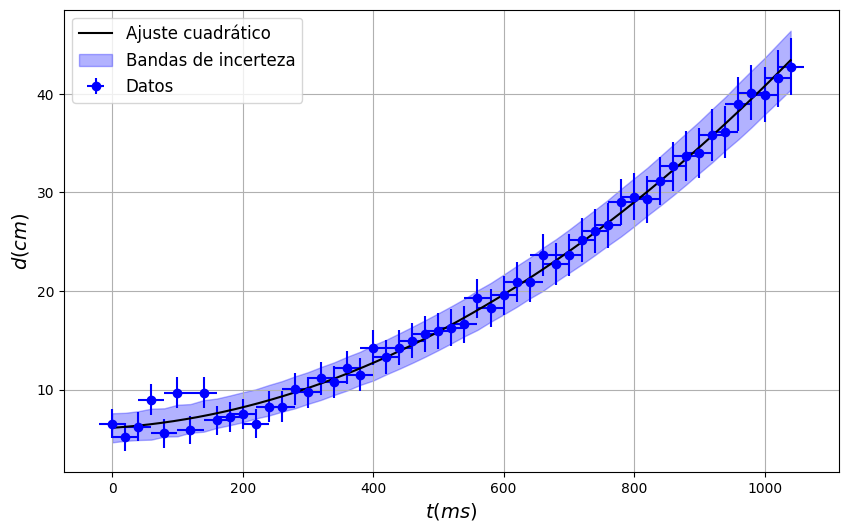

Parámetros del ajuste cuadrático:
a = 3.030747618355549e-05 ± 3.245164804094261e-06
b = 0.0043463645710066995 ± 0.0031753508902583696
c = 6.124051533799481 ± 0.6224031340936867
600


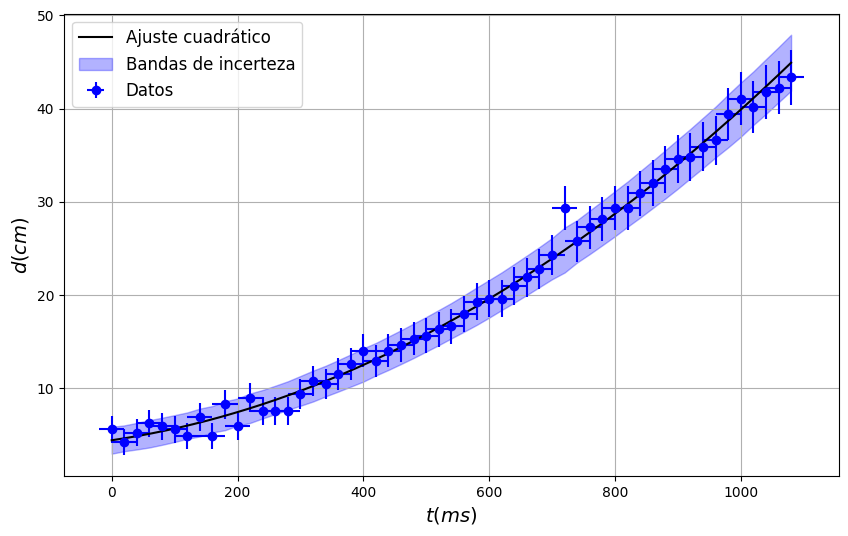

Parámetros del ajuste cuadrático:
a = 2.545315821679704e-05 ± 2.9545861632618238e-06
b = 0.01002870991114021 ± 0.00297899719931211
c = 4.392773848977218 ± 0.5950878257285905


In [18]:
def modelo_cuadratico(t, a, b, c):
    return a * t**2 + b * t + c

# FUNCIONES SACADAS DE CALIBRACIÓN

def distancia(v):
    return 0.0178*v - 1.2753

def sigma_d(v):
    return 0.0007*v + 1.1673

def f_propagacion_errores(t, popt, errores_x):
    """
    Function to propagate the errors based on the fit parameters and x-axis errors.
    
    Parameters:
    t (array-like): Independent variable (time) data points
    popt (array-like): Fitted parameters from curve_fit
    errores_x (array-like): Error values for the independent variable data points (x-axis)
    
    Returns:
    sigma_d_t (array-like): Propagated uncertainty in the dependent variable (y-axis)
    """
    a, b, c = popt
    # Error propagation formula for quadratic fit
    sigma_d_t = np.sqrt((2 * a * t + b) ** 2 * errores_x ** 2)
    return sigma_d_t

def position(f_data):
    # Example data
    tiempo = f_data["t"].values
    posicion = distancia(f_data["x"].values)
    errores_y = sigma_d(f_data["x"].values)
    errores_x = 20

    # Fit the quadratic model to the data
    popt, pcov = curve_fit(modelo_cuadratico, tiempo, posicion, sigma=errores_y, absolute_sigma=True)

    # Extract the fitted parameters and their uncertainties
    a, b, c = popt
    errores = np.sqrt(np.diag(pcov))

    # Propagate errors
    sigma_d_t = f_propagacion_errores(tiempo, popt, errores_x)

    # Create a smoother time range for plotting the fitted curve
    t_ajuste = np.linspace(min(tiempo), max(tiempo), 500)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot the data points with error bars on both axes
    plt.errorbar(tiempo, posicion, xerr=errores_x, yerr=errores_y, fmt='o', color='blue', label='Datos')

    # Plot the quadratic fit
    plt.plot(t_ajuste, modelo_cuadratico(t_ajuste, *popt), 'black', label='Ajuste cuadrático')

    # Plot the uncertainty bands
    plt.fill_between(tiempo, modelo_cuadratico(tiempo + sigma_d_t, *popt) + errores_y, 
                    modelo_cuadratico(tiempo - sigma_d_t, *popt) -errores_y, color='blue', alpha=0.3, label='Bandas de incerteza')

    # Customize the plot
    plt.xlabel(r'$t(ms)$', fontsize=14)
    plt.ylabel(r'$d(cm)$', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Display the plot
    plt.show()

    # Print the fitted parameters and their uncertainties
    print('Parámetros del ajuste cuadrático:')
    print(f'a = {a} ± {errores[0]}')
    print(f'b = {b} ± {errores[1]}')
    print(f'c = {c} ± {errores[2]}')

for i in range(len(datasets)):
    data = pd.read_csv(datasets[i])
    for intento in range(1, 3):
        f_data = format_pd(data=data, intento=intento)
        position(f_data)